In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from pathlib import Path

In [2]:
sc.logging.print_versions()

-----
anndata     0.10.4
scanpy      1.9.6
-----
PIL                         10.2.0
anyio                       NA
appnope                     0.1.3
arrow                       1.3.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
certifi                     2023.11.17
cffi                        1.16.0
charset_normalizer          3.3.2
comm                        0.2.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.2.0
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
h5py                        3.10.0
idna                        3.6
igraph                      0.10.8
ipykernel                   6.28.0
isoduration                 NA
jedi                        0.19.1
jinj

In [3]:
sc.set_figure_params(dpi=100)

In [4]:
dat1 = sc.read_10x_mtx("/Users/jonathankropski/Desktop/8745/8745_1/soupx")
demuxafy = pd.read_table("/Users/jonathankropski/Desktop/8745/8745_1/8745_1_/combined_results.tsv", sep="\t")
dat1 = dat1[np.isin(dat1.obs.index,demuxafy["Barcode"])]
dat1_obs = pd.DataFrame(dat1.obs)
dat1_obs['Barcode'] = dat1.obs.index
demuxafy_ordered = dat1_obs.merge(demuxafy, on = "Barcode")
demuxafy_ordered.index = demuxafy_ordered["Barcode"]
dat1.obs = demuxafy_ordered


In [5]:
dat1.var_names_make_unique()

dat1.obs.loc[dat1.obs["Vireo_Individual_Assignment"].isin(['donor0']), "subject"] = "Donor_01"
dat1.obs.loc[dat1.obs["Vireo_Individual_Assignment"].isin(['donor1']), "subject"] = "Donor_02"
dat1.obs.loc[dat1.obs["Vireo_Individual_Assignment"].isin(['donor2']), "subject"] = "Donor_03"

dat1.obs.loc[dat1.obs["Vireo_Individual_Assignment"].isin(['donor0']), "group"] = "Lyso - Donor_01"
dat1.obs.loc[dat1.obs["Vireo_Individual_Assignment"].isin(['donor1']), "group"] = "Lyso - Donor_02"
dat1.obs.loc[dat1.obs["Vireo_Individual_Assignment"].isin(['donor2']), "group"] = "Lyso - Donor_03"

dat1

AnnData object with n_obs × n_vars = 13393 × 36601
    obs: 'Barcode', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score', 'subject', 'group'
    var: 'gene_ids'

In [6]:
dat2 = sc.read_10x_mtx("/Users/jonathankropski/Desktop/8745/8745_2/soupx")
demuxafy = pd.read_table("/Users/jonathankropski/Desktop/8745/8745_2/8745_2_/combined_results.tsv", sep="\t")
dat2 = dat2[np.isin(dat2.obs.index,demuxafy["Barcode"])]
dat2_obs = pd.DataFrame(dat2.obs)
dat2_obs['Barcode'] = dat2.obs.index
demuxafy_ordered = dat2_obs.merge(demuxafy, on = "Barcode")
demuxafy_ordered.index = demuxafy_ordered["Barcode"]
dat2.obs = demuxafy_ordered
dat2

AnnData object with n_obs × n_vars = 5299 × 36601
    obs: 'Barcode', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score'
    var: 'gene_ids'

In [7]:
dat2.var_names_make_unique()

dat2.obs.loc[dat2.obs["Vireo_Individual_Assignment"].isin(['donor0']), "subject"] = "Donor_02"
dat2.obs.loc[dat2.obs["Vireo_Individual_Assignment"].isin(['donor1']), "subject"] = "Donor_03"
dat2.obs.loc[dat2.obs["Vireo_Individual_Assignment"].isin(['donor2']), "subject"] = "Donor_01"

dat2.obs.loc[dat2.obs["Vireo_Individual_Assignment"].isin(['donor0']), "group"] = "CD66 - Donor_02"
dat2.obs.loc[dat2.obs["Vireo_Individual_Assignment"].isin(['donor1']), "group"] = "CD66 - Donor_03"
dat2.obs.loc[dat2.obs["Vireo_Individual_Assignment"].isin(['donor2']), "group"] = "CD66 - Donor_01"

dat2

AnnData object with n_obs × n_vars = 5299 × 36601
    obs: 'Barcode', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score', 'subject', 'group'
    var: 'gene_ids'

In [8]:
adata = dat1.concatenate(dat2, batch_key='sort', batch_categories=['Lysotracker', 'CD66'])
adata

/var/folders/90/nf8f2lj96kbc7q5hv483vpwc0000gp/T/ipykernel_53656/1875876644.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = dat1.concatenate(dat2, batch_key='sort', batch_categories=['Lysotracker', 'CD66'])


AnnData object with n_obs × n_vars = 18692 × 36601
    obs: 'Barcode', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score', 'subject', 'group', 'sort'
    var: 'gene_ids'

In [9]:
adata

AnnData object with n_obs × n_vars = 18692 × 36601
    obs: 'Barcode', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score', 'subject', 'group', 'sort'
    var: 'gene_ids'

In [10]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['rb'] = adata.var_names.str.startswith('RP')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'rb'], percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=3)
adata

AnnData object with n_obs × n_vars = 15730 × 26991
    obs: 'Barcode', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score', 'subject', 'group', 'sort', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'n_genes'
    var: 'gene_ids', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [11]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]
adata

View of AnnData object with n_obs × n_vars = 11505 × 26991
    obs: 'Barcode', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score', 'subject', 'group', 'sort', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'n_genes'
    var: 'gene_ids', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [12]:
cells_to_keep = ['Donor_01', 'Donor_02', 'Donor_03']

In [13]:
adata = adata[adata.obs['subject'].isin(cells_to_keep)]
adata = adata[adata.obs['scDblFinder_DropletType'].isin(['singlet'])]
adata

View of AnnData object with n_obs × n_vars = 9704 × 26991
    obs: 'Barcode', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score', 'subject', 'group', 'sort', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'n_genes'
    var: 'gene_ids', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [14]:
adata

View of AnnData object with n_obs × n_vars = 9704 × 26991
    obs: 'Barcode', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score', 'subject', 'group', 'sort', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'n_genes'
    var: 'gene_ids', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/opt/miniconda3/envs/scan/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
adata.raw = adata

In [17]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

/opt/miniconda3/envs/scan/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [18]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_rb'], n_jobs=12)

In [19]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

In [20]:
sc.external.pp.harmony_integrate(adata, 'subject', max_iter_harmony=50)

2024-04-21 15:48:52,797 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-21 15:49:35,418 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-21 15:49:35,479 - harmonypy - INFO - Iteration 1 of 50
2024-04-21 15:49:52,431 - harmonypy - INFO - Iteration 2 of 50
2024-04-21 15:50:06,507 - harmonypy - INFO - Iteration 3 of 50
2024-04-21 15:50:20,608 - harmonypy - INFO - Iteration 4 of 50
2024-04-21 15:50:25,233 - harmonypy - INFO - Iteration 5 of 50
2024-04-21 15:50:34,280 - harmonypy - INFO - Iteration 6 of 50
2024-04-21 15:50:50,806 - harmonypy - INFO - Iteration 7 of 50
2024-04-21 15:51:08,131 - harmonypy - INFO - Iteration 8 of 50
2024-04-21 15:51:23,598 - harmonypy - INFO - Iteration 9 of 50
2024-04-21 15:51:30,242 - harmonypy - INFO - Iteration 10 of 50
2024-04-21 15:51:40,840 - harmonypy - INFO - Iteration 11 of 50
2024-04-21 15:51:52,231 - harmonypy - INFO - Iteration 12 of 50
2024-04-21 15:51:54,496 - harmonypy - INFO - Converged after

In [21]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony', n_pcs=45, random_state=0)

/opt/miniconda3/envs/scan/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
sc.tl.umap(adata, random_state=0)

In [23]:
sc.tl.leiden(adata, resolution=1.5, random_state=0)

/opt/miniconda3/envs/scan/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/miniconda3/envs/scan/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


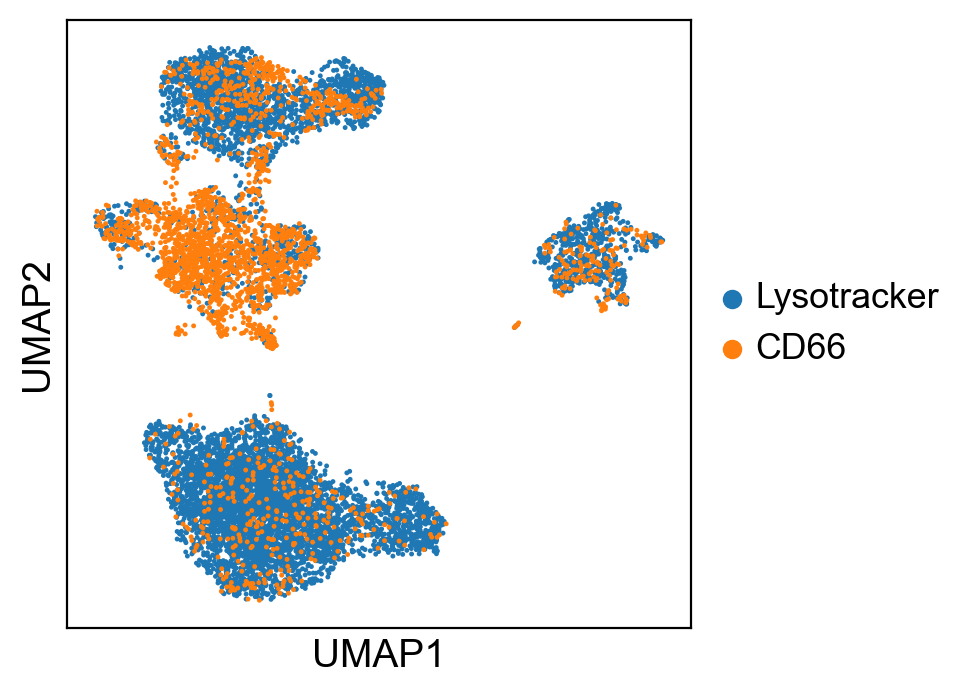

In [24]:
sc.pl.umap(adata, color='sort', title='')

/opt/miniconda3/envs/scan/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/miniconda3/envs/scan/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


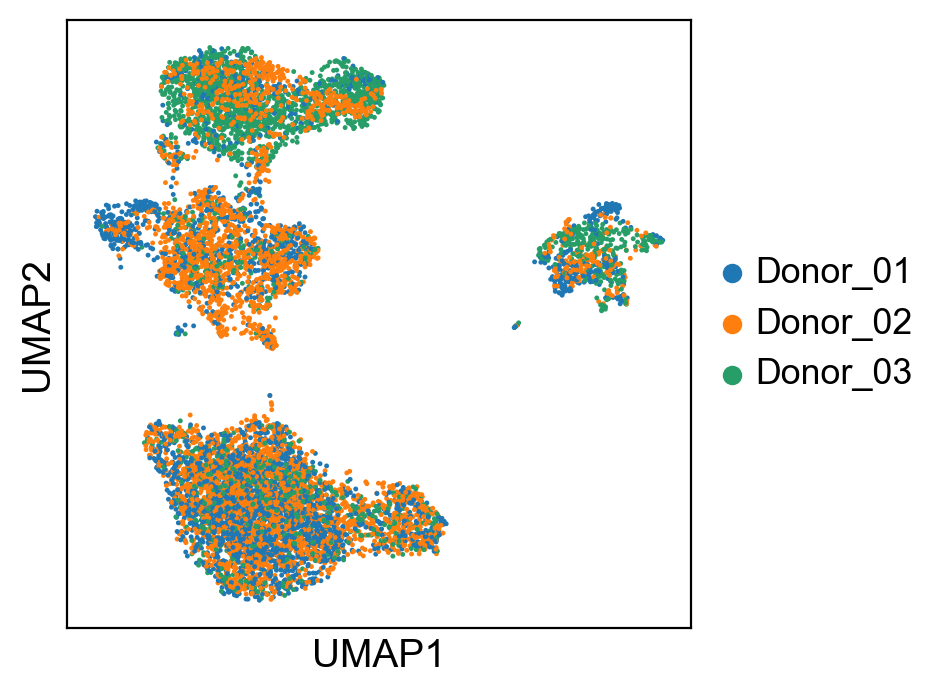

In [25]:
sc.pl.umap(adata, color='subject', title='')

In [26]:
import celltypist
from celltypist import models

In [27]:
import time

In [28]:
t_start = time.time()
predictions = celltypist.annotate(adata, model = './model_from_gse227163.pkl')
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")

👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will use `.raw.X` instead
🔬 Input data has 9704 cells and 26991 genes
🔗 Matching reference genes in the model
🧬 2297 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


Time elapsed: 1.7538318634033203 seconds


In [29]:
t_start = time.time()
predictions = celltypist.annotate(adata, model = './model_from_gse227163.pkl', majority_voting = True)
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")

👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will use `.raw.X` instead
🔬 Input data has 9704 cells and 26991 genes
🔗 Matching reference genes in the model
🧬 2297 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


Time elapsed: 14.676007986068726 seconds


In [30]:
predictions

CellTypist prediction result for 9704 query cells
    predicted_labels: data frame with 3 columns ('predicted_labels', 'over_clustering', 'majority_voting')
    decision_matrix: data frame with 9704 query cells and 43 cell types
    probability_matrix: data frame with 9704 query cells and 43 cell types
    adata: AnnData object referred

In [31]:
adata = predictions.to_adata()

In [32]:
adata.obs['celltype'] = adata.obs['majority_voting']

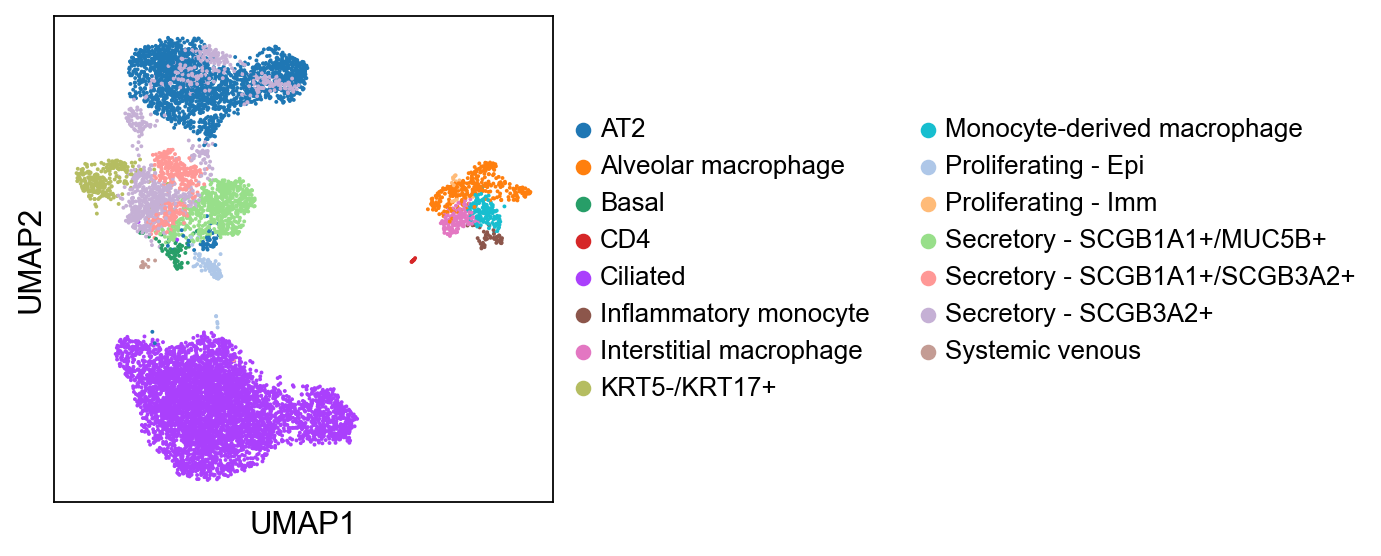

In [33]:
sc.set_figure_params(figsize=(4,4))
sc.pl.umap(adata, color='celltype', title='', legend_fontsize='small', save='celltype.png')

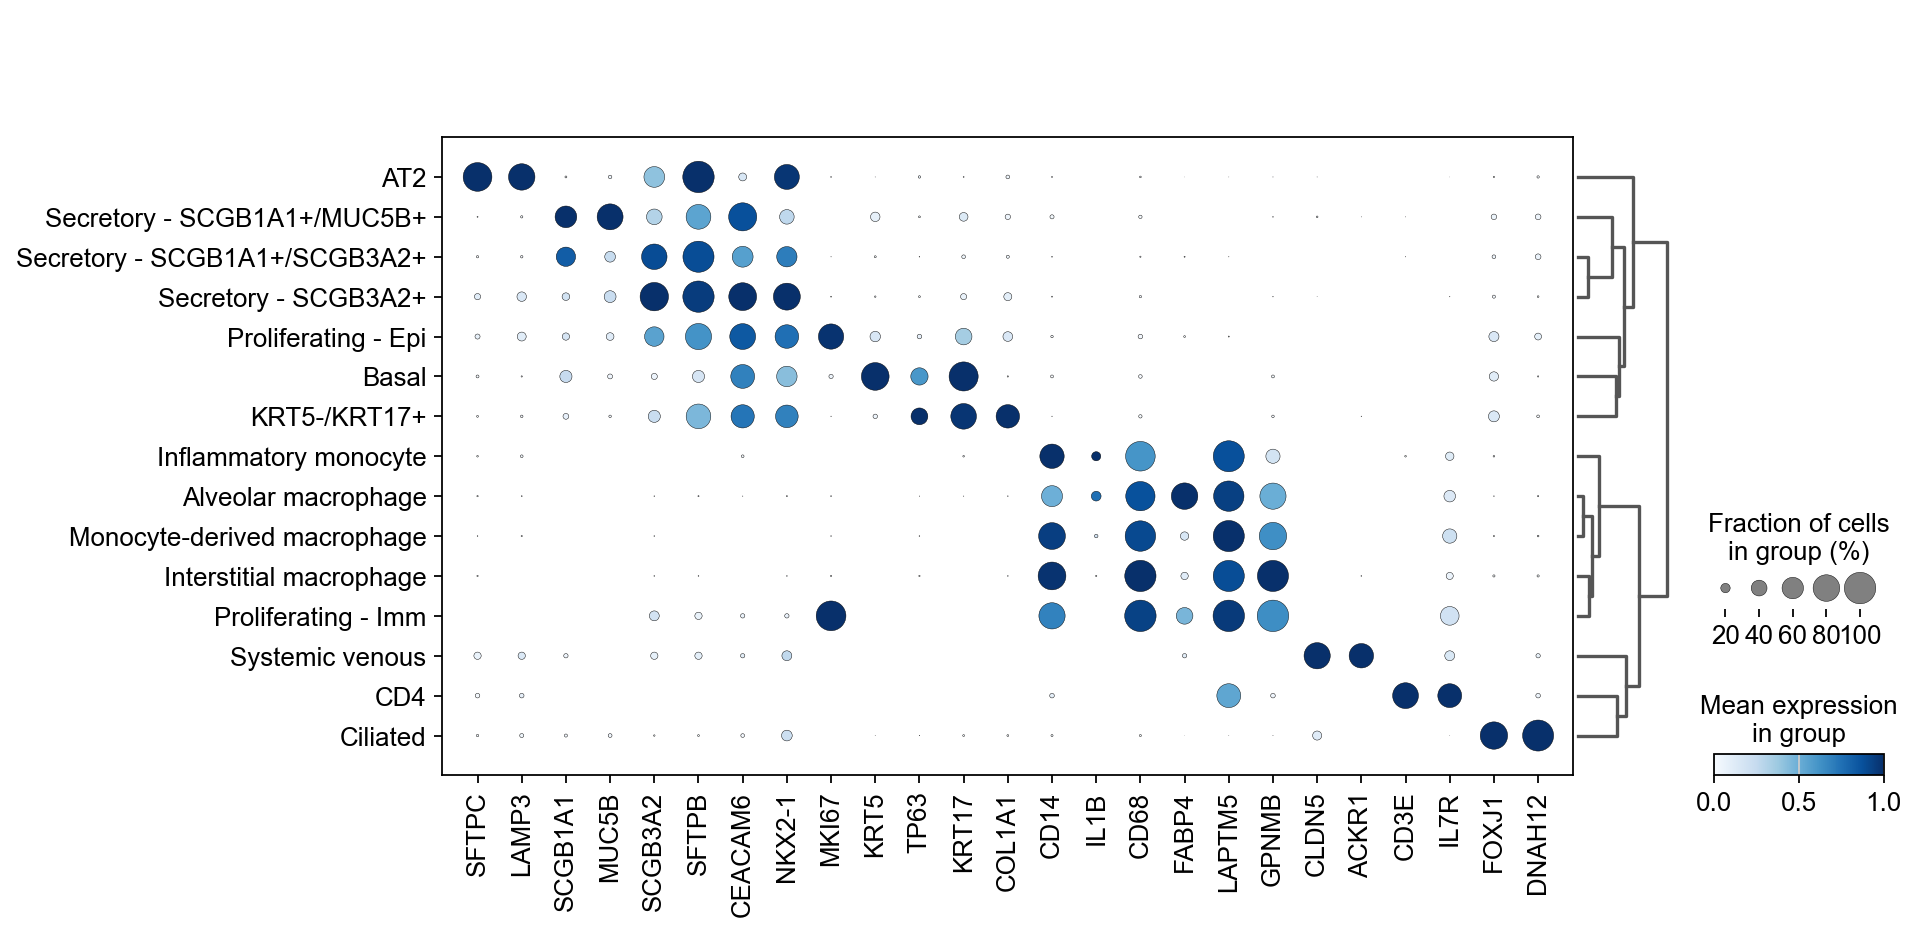

In [34]:
markers = ['SFTPC', 'LAMP3', 'SCGB1A1', 'MUC5B', 'SCGB3A2', 'SFTPB', 'CEACAM6', 'NKX2-1','MKI67', 'KRT5', 'TP63', 'KRT17', 'COL1A1', 'CD14', 'IL1B', 'CD68',  'FABP4', 'LAPTM5', 'GPNMB', 'CLDN5', 'ACKR1', 'CD3E', 'IL7R', 'FOXJ1', 'DNAH12']
sc.tl.dendrogram(adata, 'celltype')
sc.pl.dotplot(adata, markers, groupby='celltype', cmap='Blues', standard_scale='var', dendrogram=True, save='markers.png')

In [35]:
sc.tl.embedding_density(adata, basis='umap', groupby='group')

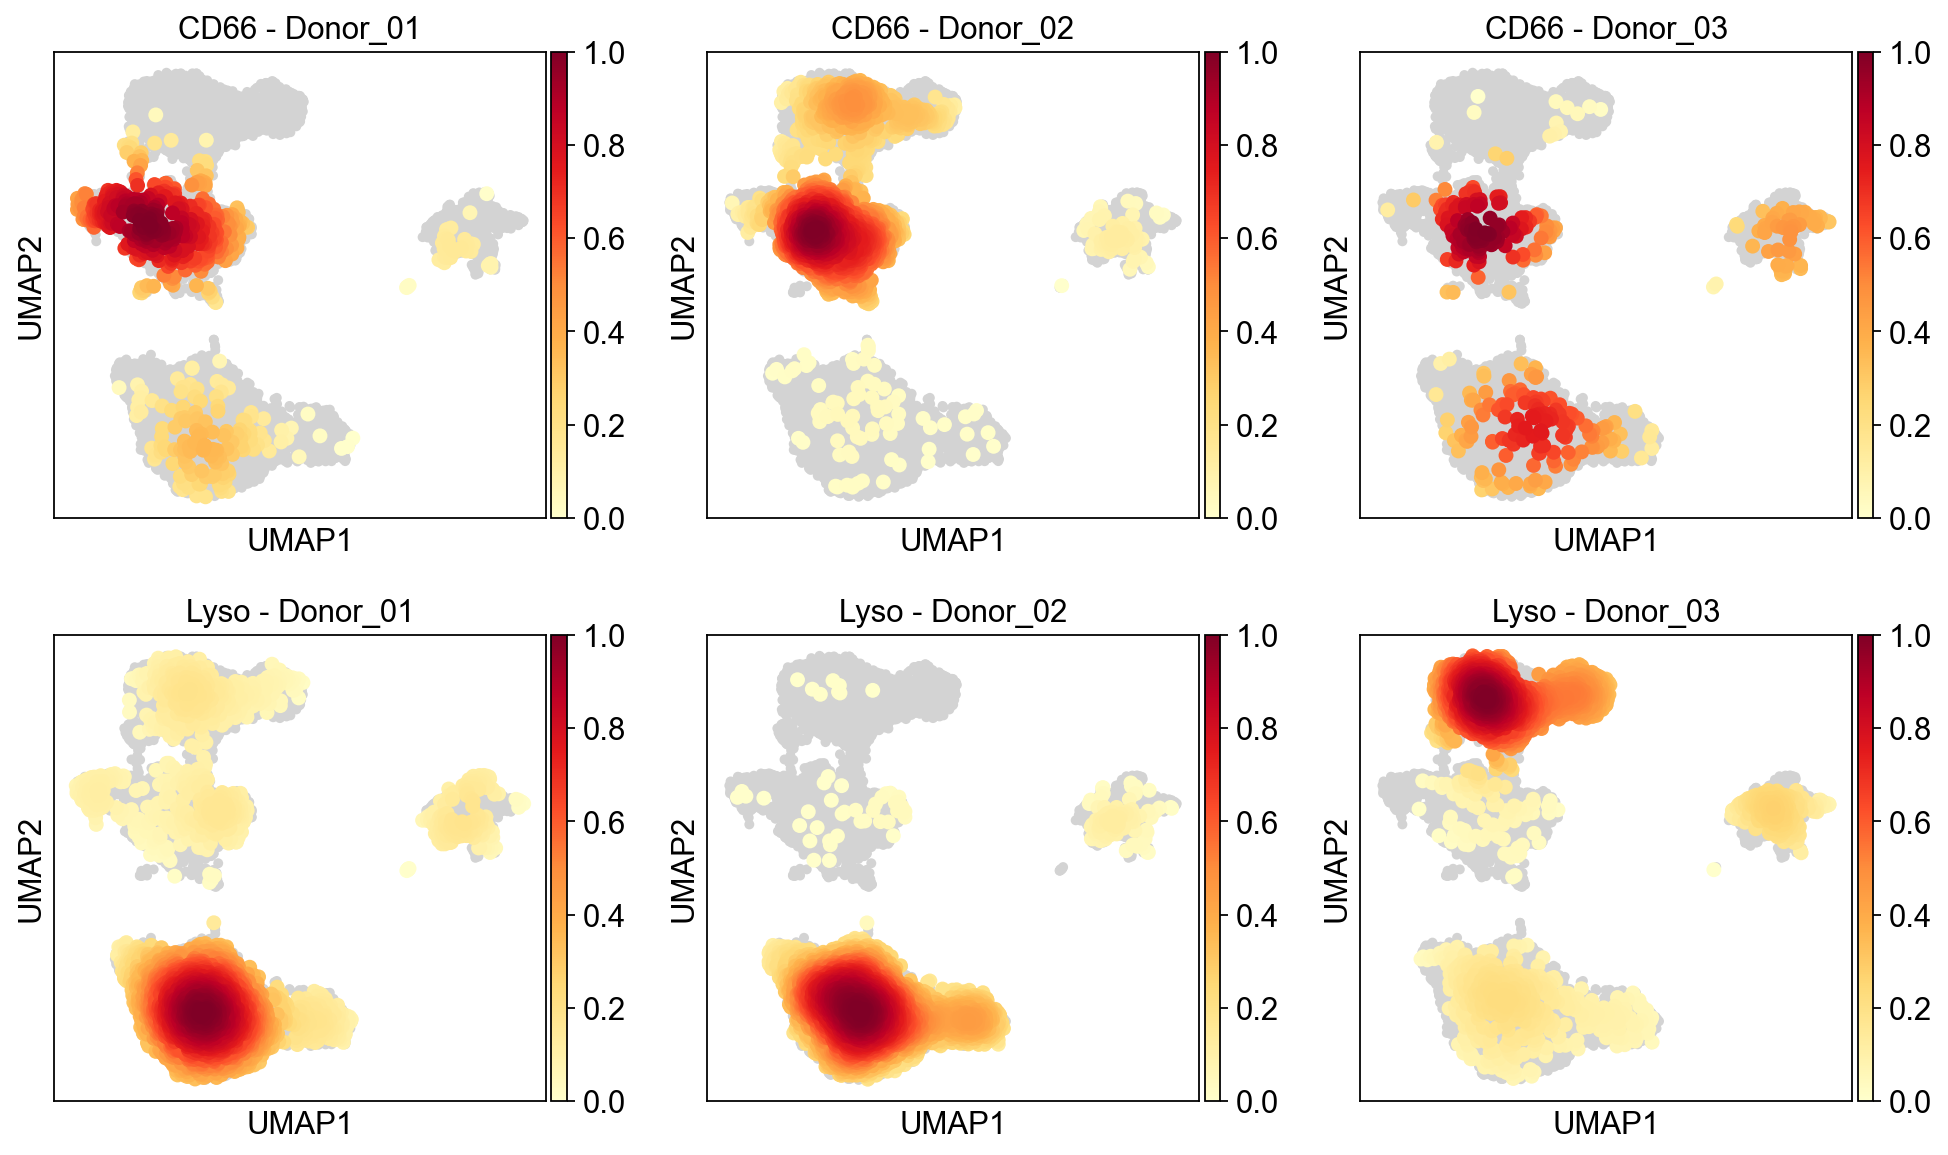

In [36]:
sc.pl.embedding_density(adata, groupby='group', ncols=3,  save='density_group.png')

In [37]:
results_file = './cell_sort_cleaned.h5ad'
adata.write(results_file)

In [38]:
df = pd.crosstab(adata.obs['group'], adata.obs['celltype'], normalize='index')
df

celltype,AT2,Alveolar macrophage,Basal,CD4,Ciliated,Inflammatory monocyte,Interstitial macrophage,KRT5-/KRT17+,Monocyte-derived macrophage,Proliferating - Epi,Proliferating - Imm,Secretory - SCGB1A1+/MUC5B+,Secretory - SCGB1A1+/SCGB3A2+,Secretory - SCGB3A2+,Systemic venous
group,,,,,,,,,,,,,,,
CD66 - Donor_01,0.027372,0.010949,0.014599,0.007299,0.244526,0.007299,0.027372,0.164234,0.007299,0.010949,0.005474,0.145985,0.071168,0.233577,0.021898
CD66 - Donor_02,0.151084,0.009907,0.034056,0.000619,0.045201,0.003715,0.013003,0.034675,0.011146,0.046440,0.001858,0.173375,0.119505,0.355418,0.000000
CD66 - Donor_03,0.039634,0.088415,0.003049,0.006098,0.402439,0.045732,0.018293,0.009146,0.018293,0.003049,0.000000,0.121951,0.161585,0.076220,0.006098
Lyso - Donor_01,0.110816,0.036433,0.001898,0.001898,0.681973,0.005693,0.021632,0.036433,0.013283,0.002277,0.001139,0.049336,0.015560,0.021632,0.000000
Lyso - Donor_02,0.002913,0.007907,0.000832,0.000000,0.942572,0.003329,0.013733,0.001665,0.008739,0.000416,0.001665,0.011652,0.003329,0.001248,0.000000
Lyso - Donor_03,0.632644,0.076782,0.000000,0.000460,0.194023,0.001839,0.002759,0.003218,0.028506,0.000920,0.000460,0.013793,0.011954,0.032644,0.000000


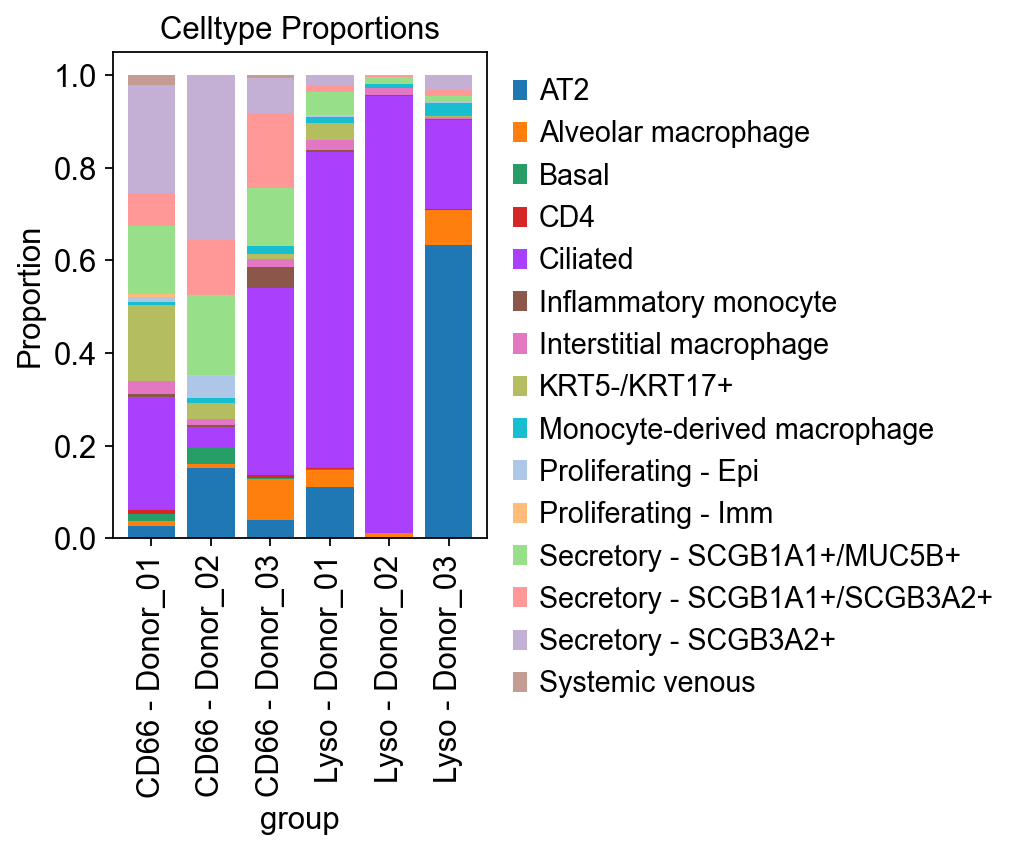

In [39]:
import matplotlib.pyplot as plt
# Plotting
sc.set_figure_params(figsize=(3,4))
df.plot(kind='bar', stacked=True, width=.8)
plt.title('Celltype Proportions')
plt.ylabel('Proportion')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
plt.grid(False)
plt.savefig('./figures/stacked_bar_plot.png', bbox_inches='tight')
plt.show()


In [40]:
df.to_csv('./cell_props.csv')

In [41]:
at2 = adata[adata.obs['celltype'].isin(['AT2'])]
at2

View of AnnData object with n_obs × n_vars = 1947 × 26991
    obs: 'Barcode', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score', 'subject', 'group', 'sort', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'n_genes', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'celltype', 'umap_density_group'
    var: 'gene_ids', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'sort_colors', 'subject_colors', 'celltype_colors', 'dendrogram_celltype', 'umap_density_group_params'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

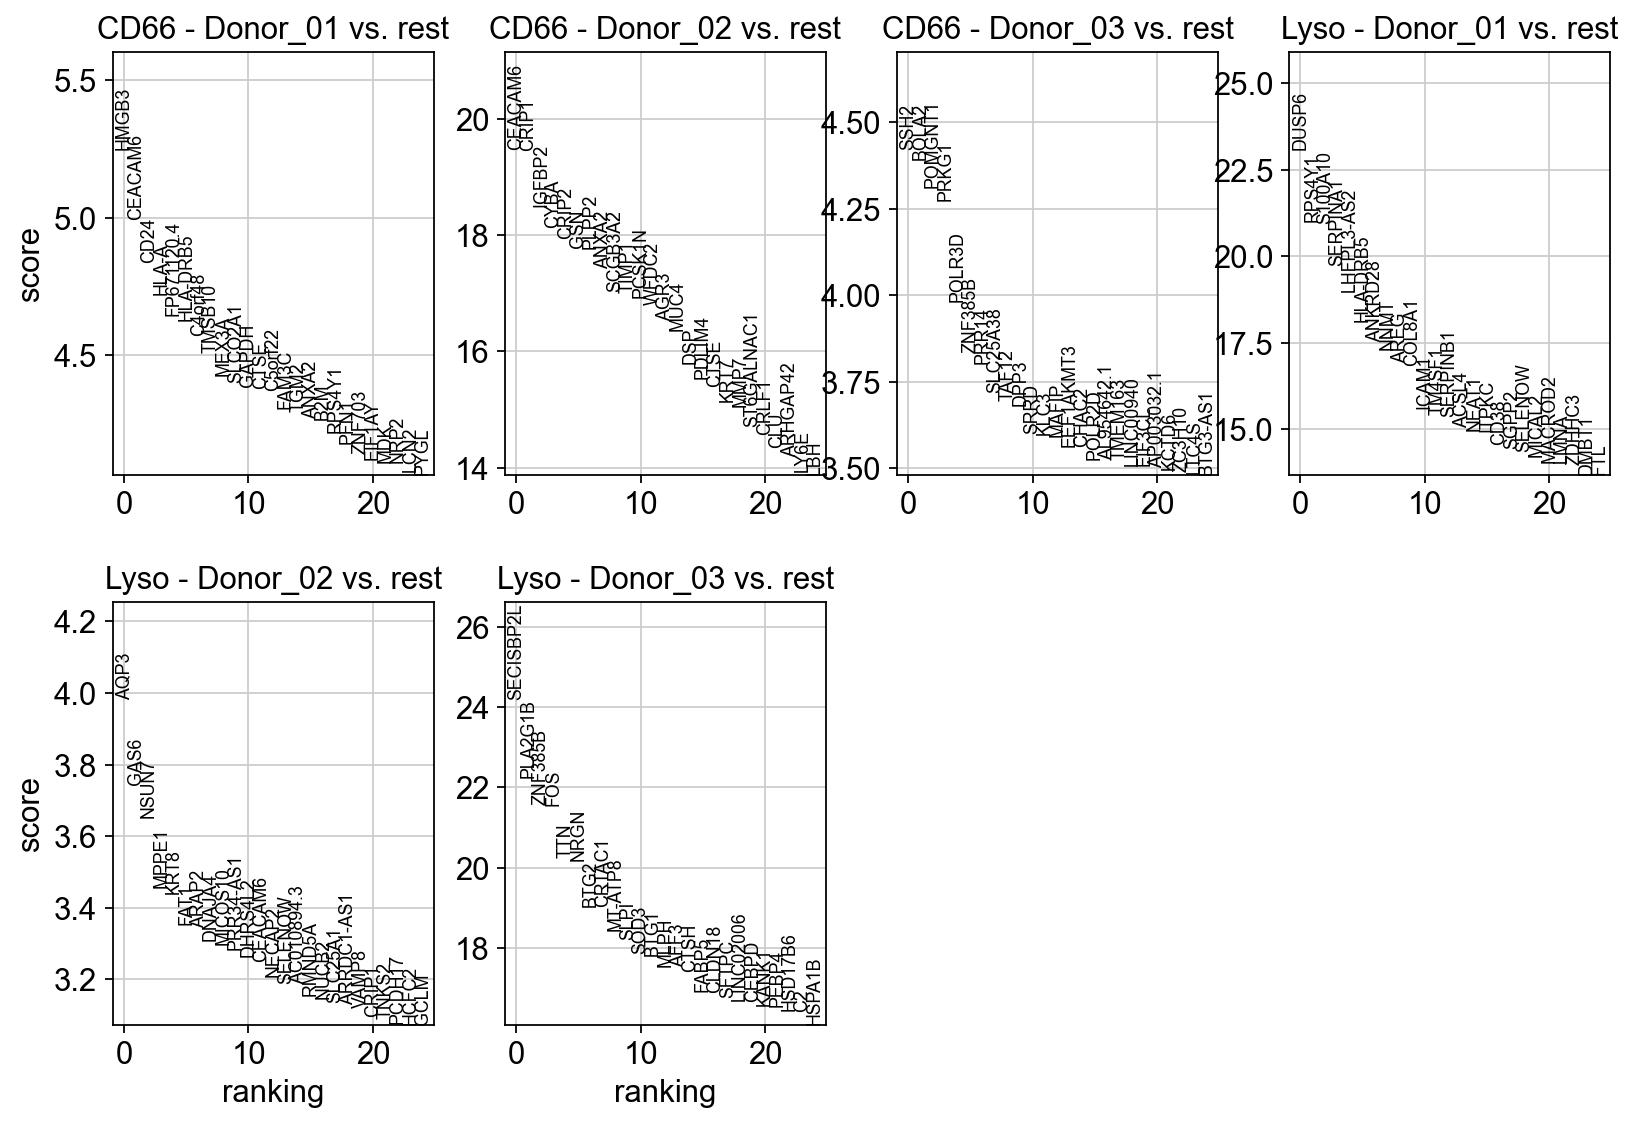

In [42]:
sc.tl.rank_genes_groups(at2, 'group', method='wilcoxon', use_raw=False)
sc.pl.rank_genes_groups(at2, n_genes=25, sharey=False)

In [43]:
at2_df = sc.get.rank_genes_groups_df(at2, group=None, pval_cutoff=0.05)
at2_df.to_csv('./at2_deg_by_group.csv')

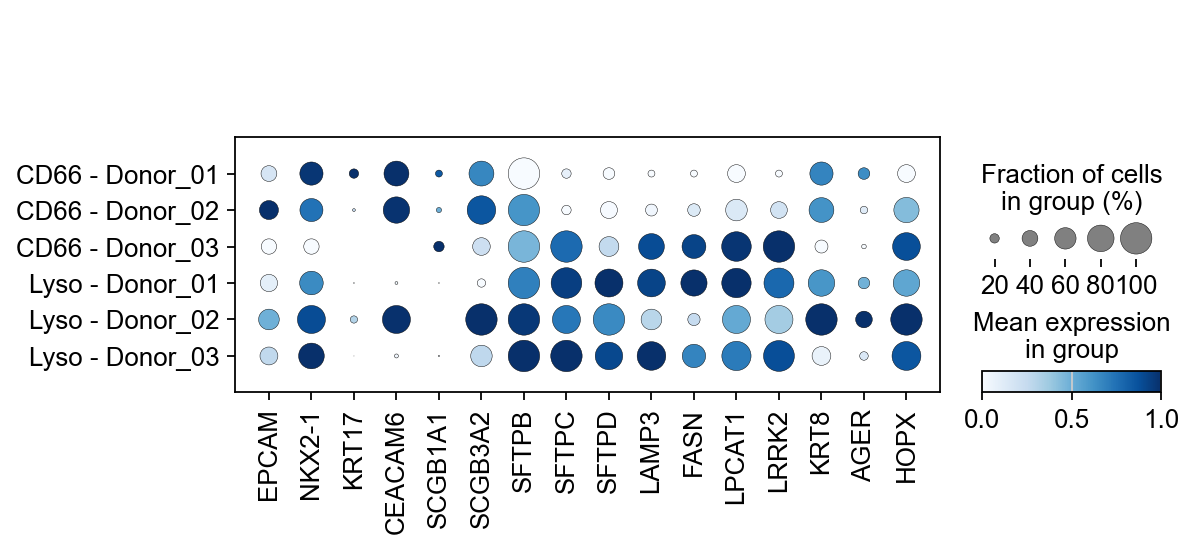

In [44]:
at2_genes = ['EPCAM', 'NKX2-1', 'KRT17', 'CEACAM6', 'SCGB1A1','SCGB3A2', 'SFTPB', 'SFTPC', 'SFTPD', 'LAMP3', "FASN", 'LPCAT1', 'LRRK2', 'KRT8', 'AGER', 'HOPX']
sc.tl.dendrogram(at2, 'group')
sc.pl.dotplot(at2, at2_genes, groupby='group', cmap='Blues', standard_scale='var', save='at2_genes.png')

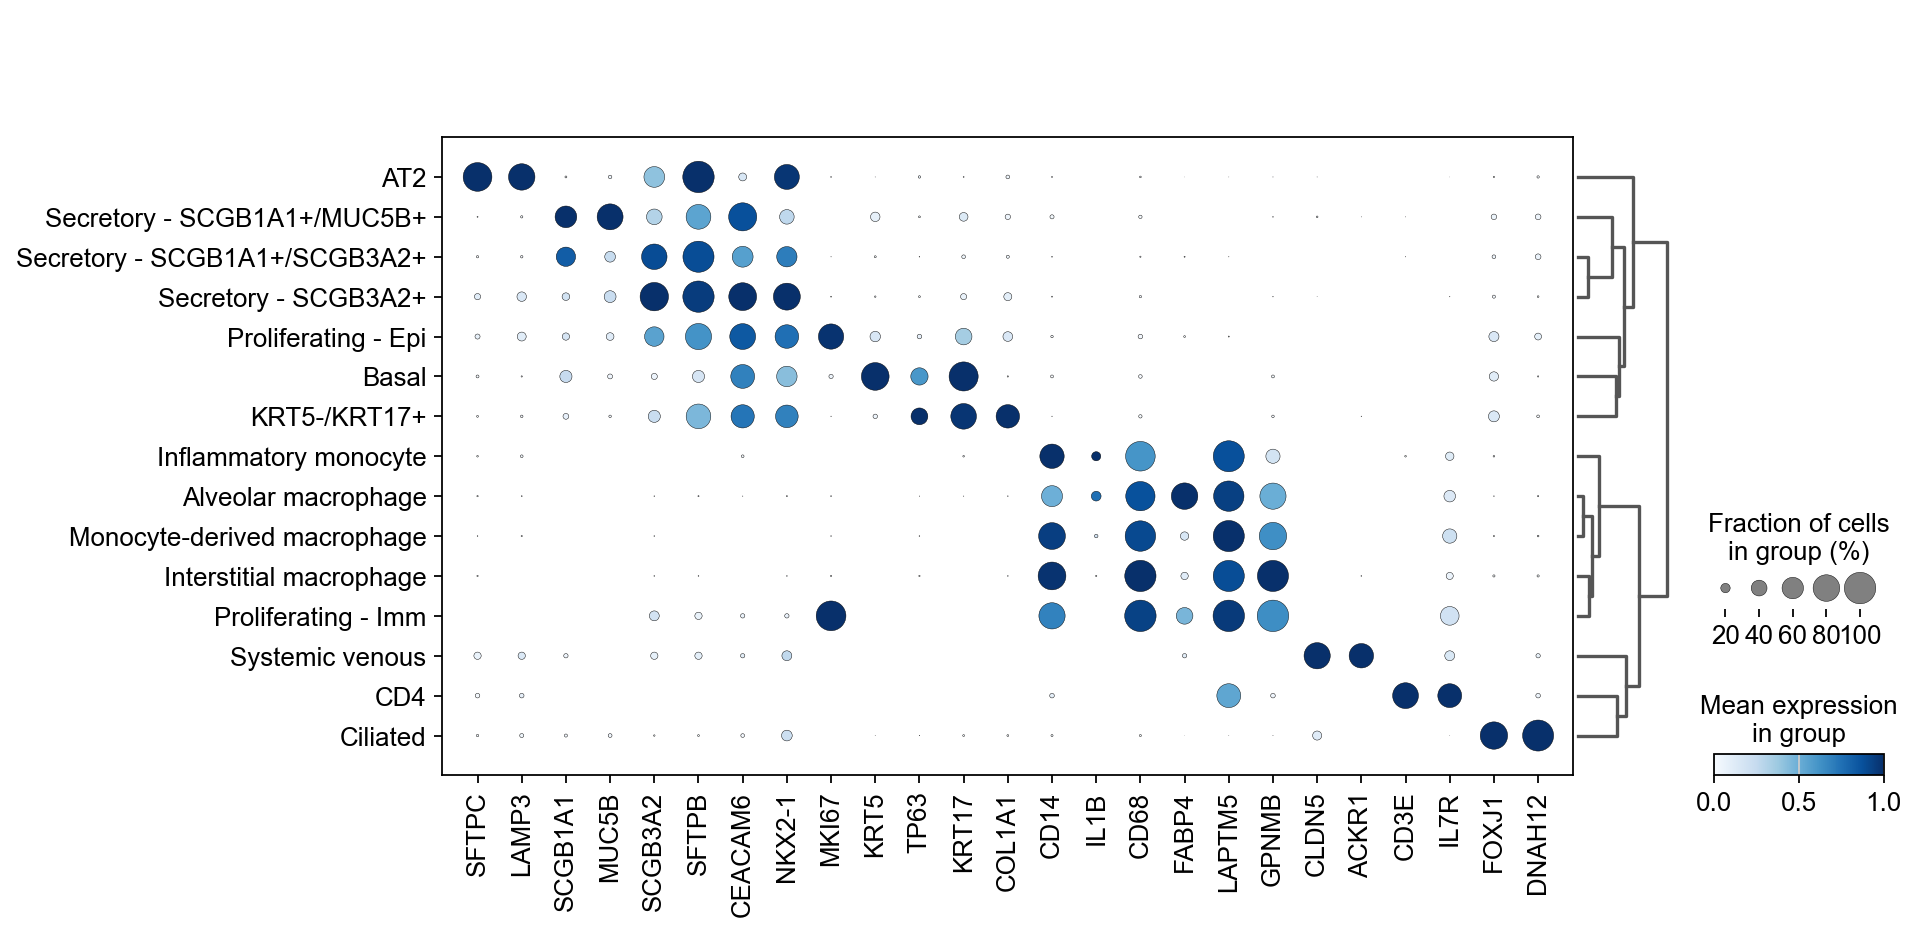

In [45]:
markers = ['SFTPC', 'LAMP3', 'SCGB1A1', 'MUC5B', 'SCGB3A2', 'SFTPB', 'CEACAM6', 'NKX2-1','MKI67', 'KRT5', 'TP63', 'KRT17', 'COL1A1', 'CD14', 'IL1B', 'CD68',  'FABP4', 'LAPTM5', 'GPNMB', 'CLDN5', 'ACKR1', 'CD3E', 'IL7R', 'FOXJ1', 'DNAH12']
sc.tl.dendrogram(adata, 'celltype')
sc.pl.dotplot(adata, markers, groupby='celltype', cmap='Blues', standard_scale='var', dendrogram=True, save='markers.png')

In [46]:
rasc = adata[adata.obs['celltype'].isin(['Secretory - SCGB3A2+'])]
rasc

View of AnnData object with n_obs × n_vars = 858 × 26991
    obs: 'Barcode', 'Vireo_Individual_Assignment', 'Vireo_DropletType', 'scDblFinder_DropletType', 'scDblFinder_Score', 'subject', 'group', 'sort', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'n_genes', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'celltype', 'umap_density_group'
    var: 'gene_ids', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'sort_colors', 'subject_colors', 'celltype_colors', 'dendrogram_celltype', 'umap_density_group_params'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

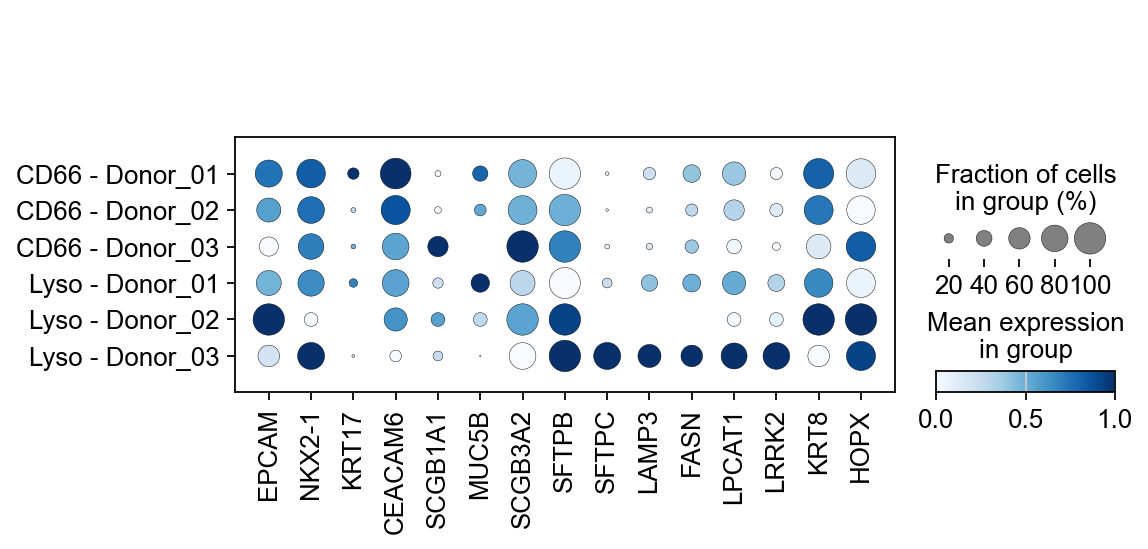

In [47]:
rasc_genes = ['EPCAM', 'NKX2-1', 'KRT17', 'CEACAM6', 'SCGB1A1', 'MUC5B', 'SCGB3A2', 'SFTPB', 'SFTPC', 'LAMP3', "FASN", 'LPCAT1', 'LRRK2', 'KRT8', 'HOPX']
sc.tl.dendrogram(rasc, 'group')
sc.pl.dotplot(rasc, rasc_genes, groupby='group', cmap='Blues', standard_scale='var', save='rasc_at2_genes.png')